In [9]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


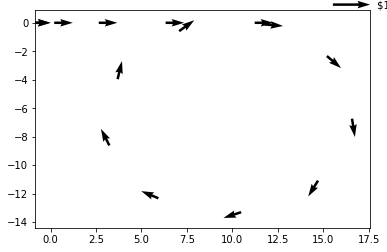

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def get_speeds(data_list):
    prevTime = 0.0
    prevPos = 0.0
    
    speeds = [0.0]
    
    for i in data_list[1:]:
        time, pos, yaw, accel = i
        
        dx = pos - prevPos
        dt = time - prevTime
        
        v = dx / dt
        
        speeds.append(v)
        
        prevTime = time
        prevPos = pos
    
    return speeds

def get_headings(data_list):
    prevTime = 0.0
    theta = 0.0
    
    headings = [0.0]
    
    for i in data_list[1:]:
        time, pos, yaw, accel = i
        
        dt = time - prevTime
        theta += yaw * dt
#         theta %= (2 * np.pi)
        
        headings.append(theta)
        
        prevTime = time
        
    return headings

def get_x_y(data_list):
    speeds = get_speeds(data_list)
    headings = get_headings(data_list)
    x = 0.0
    y = 0.0
    prevTime = 0.0
    XY = [(x, y)]
    
    for i in range(1, len(data_list)):
        speed = speeds[i]
        heading = headings[i]
        time, pos, yaw, accel = data_list[i]
        
        dt = time - prevTime
        D = speed * dt
        x += D * np.cos(heading)
        y += D * np.sin(heading)
        
        XY.append((x, y))
        
        prevTime = time
    
    return XY

def show_x_y(data_list, increment = 1):
    XY = get_x_y(data_list)
    headings = get_headings(data_list)
    
    X  = [d[0] for d in XY]
    Y  = [d[1] for d in XY]
    
    x = np.cos(headings)
    y = np.sin(headings)
    
    Q = plt.quiver(X[::increment],
                   Y[::increment],
                   x[::increment],
                   y[::increment],
                   units='x',
                   pivot='tip')
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}',
                       labelpos='E', coordinates='figure')
    plt.show()
    
show_x_y(data_list)